# Analysis 2:

# Determining the best month of travel for a pair of Origin and Destination based on weather delay

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Reading the CSV file from the disk
loc='/Users/Sneha/Downloads/Final_dataset.csv'
loc1='/Users/Sneha/Downloads/airports.csv'
air_data=pd.read_csv(loc1)
data= pd.read_csv(loc)
#Filling the NAN with 0 for DepTime and ArrTime columns
data['DepTime'].fillna(0,inplace=True)
data['ArrTime'].fillna(0,inplace=True)
##Convert the columns to int
data.DepTime=data.DepTime.astype(int)
data.ArrTime=data.ArrTime.astype(int)

/Users/Sneha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Picking the required columns
data=data[['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Origin','Dest']]
#Finding sum of all delays
data['Sum_of_delays']=data[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)
data = data[['Month','Sum_of_delays','WeatherDelay','Origin','Dest']]
#Ratio of weather delay to total delay
data['weather_delay_ratio']=data['WeatherDelay']/data['Sum_of_delays']
data1= data.groupby(['Month','Origin','Dest']).mean().reset_index()
#Merging other csv file to fetch airport data
m= pd.merge(data1,air_data,left_on='Origin',right_on='iata')
m= pd.merge(m,air_data,left_on='Dest',right_on='iata')
m= m[['Month','Origin','city_x','Dest','city_y','Sum_of_delays','WeatherDelay','weather_delay_ratio']]
m= m.rename(columns={'city_x':'Origin_city_name','city_y':'Dest_city_name'})
#Get distinct copy of origin and destination
dist_or_de=m[['Origin','Dest']].drop_duplicates()
flag=0
#New dataframe and put the output columns
col=['index','Month','Origin','Origin_city_name','Dest','Dest_city_name','Sum_of_delays','WeatherDelay','weather_delay_ratio']

temp1=pd.DataFrame()
sep=pd.DataFrame(columns=col)
sep.loc[0]=['','Next_Origin_Dest_Combination','','','','','','','']
#Function to sort for a pair of origin and destination
def sorter(v):
    global temp1
    global flag
    # Selecting specific pair of destinations
    temp=m[(m.Origin==v[0])&(m.Dest==v[1])]
    # Sorting based on weather delay ratio
    temp=temp.sort(['weather_delay_ratio'], ascending=[False]).reset_index()
    if flag==0:
        temp1=temp
    else:
        x=[temp1,temp]
        temp1=pd.concat(x)
    flag=1
dist_or_de.apply(sorter,axis=1)
#Write to CSV file
m=m[['Month','Origin','Origin_city_name','Dest','Dest_city_name','Sum_of_delays','WeatherDelay','weather_delay_ratio']]
#Writing to csv file
m.to_csv("output_Analysis_2.csv",index = False)


/Users/Sneha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


    Month Origin Origin_city_name Dest Dest_city_name  Sum_of_delays  \
68      1    ALB           Albany  ATL        Atlanta       7.457143   
69      2    ALB           Albany  ATL        Atlanta       3.375000   
70      3    ALB           Albany  ATL        Atlanta       7.806452   
71      4    ALB           Albany  ATL        Atlanta       4.536585   
72      5    ALB           Albany  ATL        Atlanta       8.206897   

    WeatherDelay  weather_delay_ratio  
68      0.000000             0.000000  
69      3.090909             0.246377  
70      0.000000             0.000000  
71      0.000000             0.000000  
72      0.000000             0.000000  


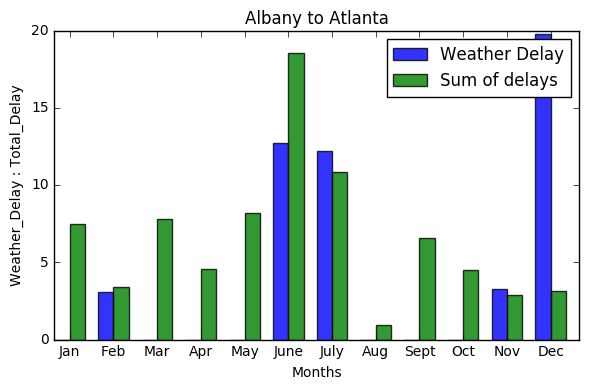

In [8]:
zz=m[m['Origin']=='ALB']
zz1=zz[zz['Dest']=='ATL']
print(zz1.head())


# data to plot

n_groups = 12

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, zz1['WeatherDelay'], bar_width, alpha=opacity, color='b', label='Weather Delay')

rects2 = plt.bar(index + bar_width, zz1['Sum_of_delays'], bar_width, alpha=opacity, color='g', label='Sum of delays')

plt.xlabel('Months')
plt.ylabel('Weather_Delay : Total_Delay')
plt.title('Albany to Atlanta')
plt.xticks(index + bar_width, ('Jan', 'Feb', 'Mar', 'Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
plt.legend()
plt.savefig('/Users/Sneha/Downloads/Plot_Analysis_2.png')
plt.tight_layout()
plt.show()
